
# Ungraded Lab: Beyond Hello World, A Computer Vision Example:

What about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where you will build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.

In [2]:
import tensorflow as tf

print(tf.__version__)

2.11.0


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [6]:
f_mnist = tf.keras.datasets.fashion_mnist

#loading datasets for training and testing.
(training_data, training_labels), (testing_data, testing_labels) = f_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Calling load_data() on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.

Label: 8

Image in pixels:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   2   0   0  61 132 163 167 136  60   0   0   0   0   1   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   1   0  12 165 181  78  35  37  75 169 154  15   0   0   0   1   0   1   0   0]
 [  0   0   0   0   0   0   0   1   0   0 174 102   0   0   0   0   0   0 144 193  25   0   1   1   0   0   0   0]
 [  0   1   0   0   1   0   1   0   0 109  84   0   0   0   1   0   2   0   0 140 125   3   0   2   0   0   0   0]
 [  0   0   1   0   0   0   2   0 113 170  47   0   2   0   0   1   1   2   0  80 163  80   0   0   0   0   1   0]
 [  0   1   2   0   2   0   0  50 148 163 168   0   0   0   1   1   2   4   0 155 140 158  74   0   1   0   1   0]
 [  1   0   0   0   4   4   0  99 135 200 186   0   0   0   0   1   1   0   0 153 140 201 170   0   1   2   2   0]
 [  0   0   6   0   0   0   0 143 182 225 142   0   

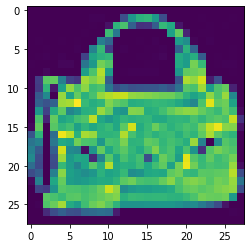

In [7]:
import numpy as np
import matplotlib.pyplot as plt

index = 3851

np.set_printoptions(linewidth=320)

print(f'Label: {training_labels[index]}')
print(f'\nImage in pixels:\n {training_data[index]}')

# Visualize the image
plt.imshow(training_data[index])

In [8]:
# Normalize the pixel values of the train and test images
training_data = training_data/255.0
testing_data = testing_data/255.0

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called normalization and fortunately in Python, it's easy to normalize an array without looping.

In [20]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

The idea is to have 1 set of data for training, and then another set of data that the model hasn't yet seen. This will be used to evaluate how good it would be at classifying values.

# Designing the model:

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Our images were a 28x28 pixel matrix when you printed them out. Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do.

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values greater than 0 to the next layer in the network.


In [18]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input for softmax fun: {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print('output of softmax fun: ', outputs.numpy())

sum = tf.reduce_sum(outputs)
print(f'sum of outputs of softmax fun: {sum}')

prediction = np.argmax(outputs)
print('class with highest probability: ', prediction)

input for softmax fun: [[1. 3. 4. 2.]]
output of softmax fun:  [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs of softmax fun: 1.0
class with highest probability:  2


Explaination here!

In [23]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_data, training_labels, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2811 - accuracy: 0.8963
Epoch 2/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2663 - accuracy: 0.9014
Epoch 3/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2555 - accuracy: 0.9044
Epoch 4/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2472 - accuracy: 0.9076
Epoch 5/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2370 - accuracy: 0.9118
Epoch 6/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2301 - accuracy: 0.9143
Epoch 7/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2240 - accuracy: 0.9169


# Building Model:
You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling model.fit() asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

In [24]:
# Evaluate the model on unseen data
model.evaluate(testing_data, testing_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.8830


[0.33947238326072693, 0.8830000162124634]

You can expect the accuracy here to be about `0.88` which means it was 88% accurate on the entire test set. As expected, it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

# Further Excercises:

### Exercise 1:

For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [25]:
classifications = model.predict(testing_data)

print(classifications[0])

313/313 [==============================] - 2s 2ms/step
[1.3507367e-06 1.9077364e-08 3.2503567e-10 4.3803702e-10 3.0037344e-09 3.9500970e-02 8.3430312e-09 2.4487976e-02 3.5905759e-07 9.3600923e-01]


**Hint:** try running `print(test_labels[0])` -- and you'll get a `9`. Does that help you understand why this list looks the way it does? 

In [26]:
print(testing_labels[0])

9


### E1Q1: What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value. i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.


### E1Q2: How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot


### Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [29]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4718
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3577
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3195
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2974
Epoch 5/5
313/313 [==============================] - 2s 5ms/step
[4.0398803e-07 4.8372137e-08 1.8601304e-08 4.9160509e-08 1.6789861e-07 1.2935998e-03 6.3470075e-08 2.3213614e-02 4.4563773e-08 9.7549200e-01]
9


### E2Q1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

### Exercise 3: 

### E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case? 



In [32]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5246
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3881
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3522
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3283
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[5.0566268e-06 6.2735445e-08 1.9432068e-06 7.2346879e-06 3.4118247e-07 1.1632062e-02 1.5884478e-05 1.5629536e-01 3.4601823e-04 8.3169609e-01]
9


You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writing all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

### Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.



You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

### Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 



In [33]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Add a layer here,
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu), # Add a layer here
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 2.3125
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 2.3026
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 2.3026
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 2.3026
Epoch 5/5
313/313 [==============================] - 1s 4ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
9


There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 


### Exercise 6: 

### E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case? 

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value decrease more slowly, and sometimes increases. You'll also likely see that the results of `model.evaluate()` didn't improve much. It can even be slightly worse.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [36]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=15) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)


Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4964
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3746
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3327
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3115
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2931
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2783
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2665
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2590
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2476
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2379
Epoch 11/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2292
Epoch 12/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2239


0.42465952038764954

### Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 60% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [37]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.9): # Experiment with changing this value
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])


Epoch 1/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4736 - accuracy: 0.8300
Epoch 2/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3602 - accuracy: 0.8683
Epoch 3/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3215 - accuracy: 0.8813
Epoch 4/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2972 - accuracy: 0.8906
Epoch 5/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2793 - accuracy: 0.8969
Epoch 6/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2659 - accuracy: 0.8996
Epoch 7/15
1871/1875 [============================>.] - ETA: 0s - loss: 0.2524 - accuracy: 0.9064
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2523 - accuracy: 0.9065
